# Assignment 3: Logistic Regression


## Problem statement

You are working as a Data Scientist at a Finance company which proposes home loans. When a customer applies for a home loan, the company studies his demand to decide whether he/she is eligible or not.

Your boss asks you to develop a decision-aid tool to automate the loan eligibility process. The tool is supposed to be given as input the information provided by the customer while filling his/her online loan application form. These information include customer's personal citeria such as Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History, etc... To develop the algorithm/model to be applied in the tool, you are given a data set containing historical information about applicants (**features**) as well as their loan status (**output** given as binary variable indicating whether or not a the loan was approved).

![image.png](attachment:image.png)

1- Load data

In [238]:
# imports
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# show plots in the notebook
%matplotlib inline

In [239]:
# load dataset
df = pd.read_csv("loan_prediction.csv")

# shape of df
df.shape


(614, 13)

In [240]:
assert df.shape == (614, 13)

In [241]:
# head of df
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


2- Remove the "Loan_ID" column, and then transform the "Loan_Status" feature from categorical into numerical values (Y ==> 1, N ==> 0)

In [242]:
df.drop("Loan_ID", axis=1, inplace=True)
df["Loan_Status"] = pd.to_numeric(df["Loan_Status"].replace(["Y", "N"], [1, 0]))

In [243]:
assert df.shape == (614, 12); assert df["Loan_Status"].dtype != 'O'

## Data Exploration

3- Build a dataframe named `stats` displaying information about df columns. The index is the columns names and the columns are the following :

* `type` : type of the column
* `# null` : number of null values
* `# unique` : number of unique values
* `unique values` : unique values, concatenated as one text separated with ` - `. If the number of unique values is greater than equal 10 (>= 10), print only the the first *20* characters followed by `...`

`stats` would look like this (only the last rows are displayed)

![](img/stats.png)

In [244]:
stats = pd.DataFrame(index=df.columns.values)

type = df.dtypes
stats["type"] = type

nulls = df.isnull().sum()
stats["# null"] = nulls

n_uniques = df.nunique()
stats["# unique"] = n_uniques

for column in df:
    uniques = df[column].unique()
    #print(uniques)
    #print(len(uniques))
    #print(uniques.dtype)
    
    uniques = np.array_str(uniques) 
    #print(uniques)
    #print(len(uniques))
    
    
    #if uniques.size < 10:
        
        #print(uniques)
        

        
#stats

In [245]:
#stats = # your code here
stats

,type,# null,# unique
Gender,object,13,2
Married,object,3,2
Dependents,object,15,4
Education,object,0,2
Self_Employed,object,32,2
ApplicantIncome,int64,0,505
CoapplicantIncome,float64,0,287
LoanAmount,float64,22,203
Loan_Amount_Term,float64,14,10
Credit_History,float64,50,2


4- Fill the null values in the column **[Married]** by the most frequent one (which is "Yes"). Then, remove all the rows containing at least one NullValue.

In [246]:
df = df.fillna(value = {"Married": df["Married"].mode().iloc[0]})
df = df.dropna()
print(df.shape)
print(df)

(480, 12)
     Gender Married Dependents     Education Self_Employed  ApplicantIncome  \
1      Male     Yes          1      Graduate            No             4583   
2      Male     Yes          0      Graduate           Yes             3000   
3      Male     Yes          0  Not Graduate            No             2583   
4      Male      No          0      Graduate            No             6000   
5      Male     Yes          2      Graduate           Yes             5417   
..      ...     ...        ...           ...           ...              ...   
609  Female      No          0      Graduate            No             2900   
610    Male     Yes         3+      Graduate            No             4106   
611    Male     Yes          1      Graduate            No             8072   
612    Male     Yes          2      Graduate            No             7583   
613  Female      No          0      Graduate           Yes             4583   

     CoapplicantIncome  LoanAmount  Loan_

In [247]:
assert df.isnull().sum().sum() == 0

# Data Visualization

5-1- Plot a **bar plot** of the column **Loan_Status** (% of each class). 

<AxesSubplot:title={'center':'Loan Status %'}, xlabel='Loan_Status'>

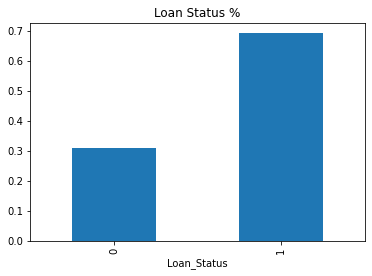

In [248]:
(df.groupby('Loan_Status').size()/df.shape[0]).plot(kind="bar",title="Loan Status %")

5-2- How many approved and non approved loans are there ? How much accuracy can you get if prediction is always equal to "*1*" ?

In [249]:
approved = (df.Loan_Status == 1).sum()
non_approved = (df.Loan_Status == 0).sum()
total = approved + non_approved
print("There are " + str(approved) + " approved loans and " + str(non_approved) + " non approved ones." )

There are 332 approved loans and 148 non approved ones.


In [250]:
approved_prediction = 480
accuracy = 1 - abs(approved/total - approved_prediction/total) / (approved/total)
print("Accuracy = " + str(accuracy) + " if prediction is always equal to 1")

Accuracy = 0.5542168674698795 if prediction is always equal to 1


6-1- Create a function to be named **make_bar_plot**, which takes two parameters as input: a dataframe df (parameter 1) and a column name (parameter 2). The function must output a borplot of the approval rate `Loan_Status` by value of the column.

Calling `make_bar_plot` on `Property_Area` should look like this

![](img/bar_plot.png)

In [251]:
def make_bar_plot(df, column):
    
    data=pd.DataFrame()
    
    data['total']= df.groupby(column).size()
    data['approved'] = df.groupby(column).sum()['Loan_Status']
    data['percentage'] = round(data['approved']/data['total'], 2)

    data['percentage'].plot(kind="barh", title="Approval rate per "+str(column))
    plt.show()

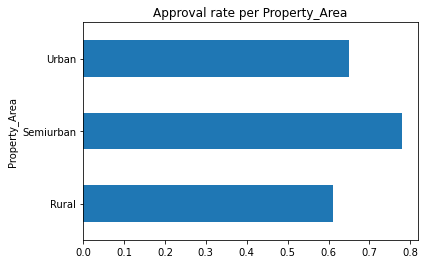

In [252]:
make_bar_plot(df, 'Property_Area')

6-2- Create a function to be named **make_box_plot**, which takes two parameters as input: a dataframe df (parameter 1) and a column name (parameter 2). The function must output a boxplot of the distribution of the column by `Loan_Status`.

Calling `make_box_plot` on `ApplicantIncome` should look like this

![](img/box_plot.png)

In [253]:
def make_box_plot(df, column):  
    
    fig = plt.figure(figsize=(10, 5))
    fig.clf()
    ax = fig.gca()
    df.boxplot(column = column, by = 'Loan_Status', ax = ax)
    ax.set_xlabel('Loan_Status')
    ax.set_ylabel(column)
    ax.set_title(column)    


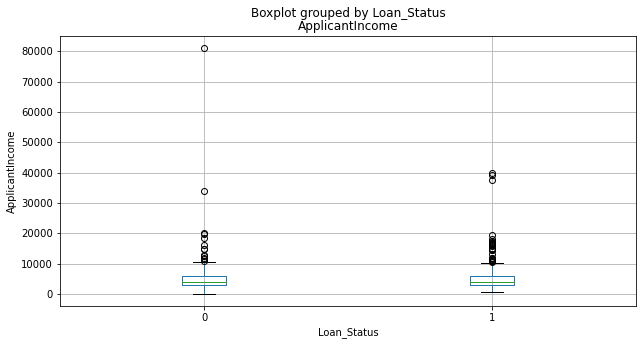

In [254]:
make_box_plot(df, 'ApplicantIncome')

6-3- Loop through df columns, except for the target and make a plot depending:

* if the column is numeric, call `make_box_plot`
* else, call `make_bar_plot`

****************** Gender *******************


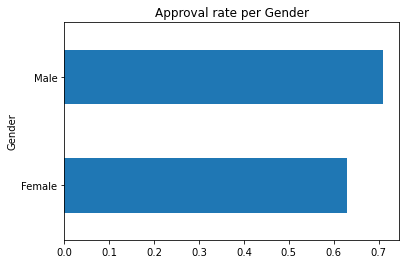

****************** Married *******************


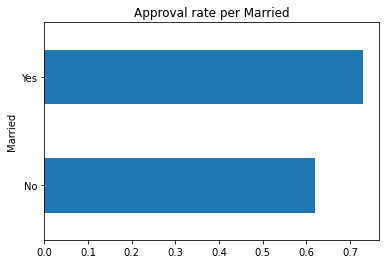

****************** Dependents *******************


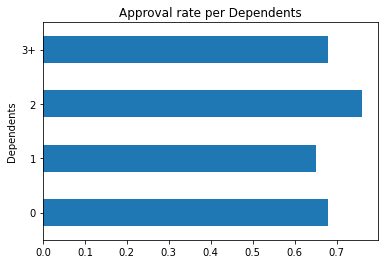

****************** Education *******************


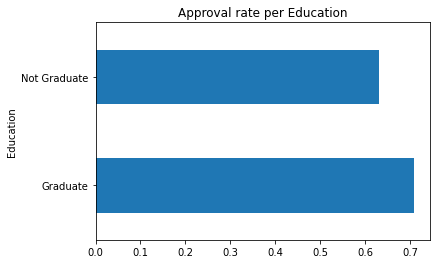

****************** Self_Employed *******************


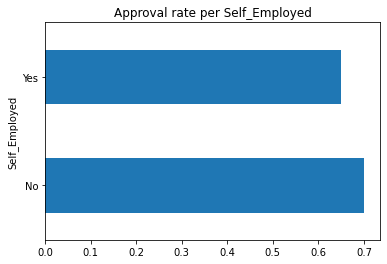

****************** ApplicantIncome *******************
****************** CoapplicantIncome *******************
****************** LoanAmount *******************
****************** Loan_Amount_Term *******************
****************** Credit_History *******************
****************** Property_Area *******************


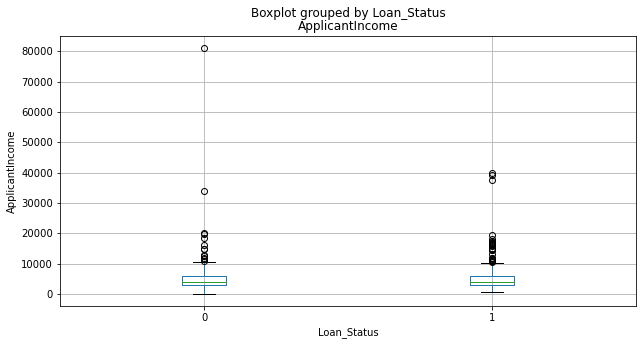

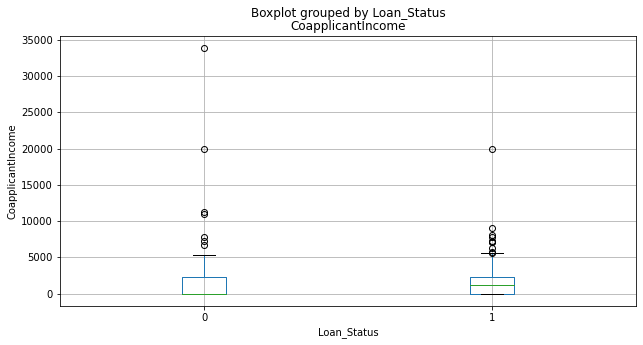

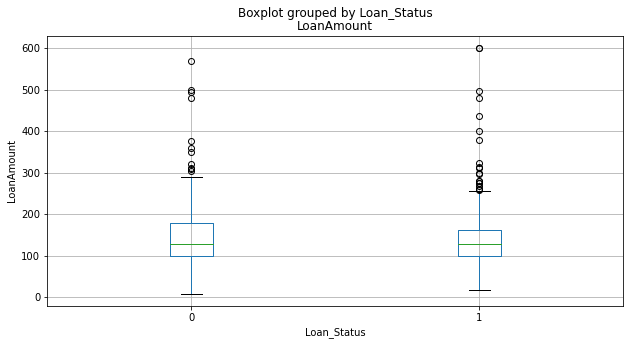

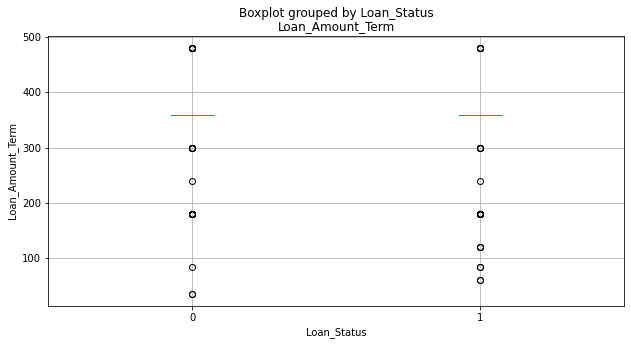

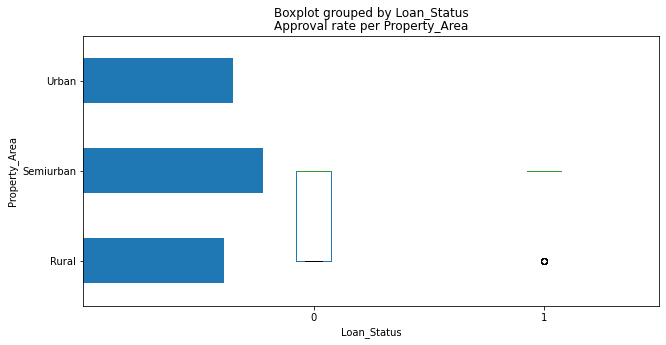

****************** Loan_Status *******************


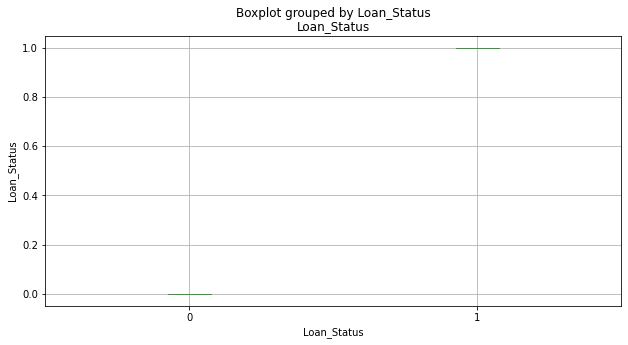

In [255]:
from pandas.api.types import is_numeric_dtype

for col in df.columns:
    
    print(f'****************** {col} *******************')
    
    if is_numeric_dtype(df[col]):
        make_box_plot(df, col)
        
    else:
        make_bar_plot(df, col)

# Model Training & Evaluation

7-1- Use [pandas.get_dummies](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html) to transform `Property_Area` and `Dependents` into dummy variables

In [256]:
df['Property_Area'] = pd.get_dummies(df['Property_Area'])
df['Dependents'] = pd.get_dummies(df['Dependents'])

print the head of df

In [260]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,Male,Yes,0,Graduate,No,4583,1508.0,128.0,360.0,1.0,1,0
2,Male,Yes,1,Graduate,Yes,3000,0.0,66.0,360.0,1.0,0,1
3,Male,Yes,1,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,0,1
4,Male,No,1,Graduate,No,6000,0.0,141.0,360.0,1.0,0,1
5,Male,Yes,0,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,0,1


In [236]:
assert df.shape == (480, 17)

AssertionError: 

7-2- Use `pandas.Categorical` (as seen in *Titanic* notebook) to transform the remaining text columns of df into numerical ones

In [ ]:
# your code here

Print the head of df

In [ ]:
# your code here

In [ ]:
assert 'object' not in [df[f].dtype for f in df.columns]

8-1 Load the target variable "Loan_Status" into a dataframe and call it y. Then, load the features into a second dataframe and call it X. 

In [ ]:
y = # your code here
X = # your code here
print (X.columns)

8-2 Split the data set into a training set and a test set. Set: test_size=0.3, random_state=123

In [ ]:
# your code here

print ("train shape", # your code here)
print ("test shape", # your code here)

8-3- Fit a logistic model to the training set, and then report the training and testing accuracies

In [ ]:
# your code here

train_score = # your code here
test_score = # your code here
print ('train accuracy =', # your code here)
print ('test accuracy =', # your code here)

9- Print the confusion matrix and compute the **precision** for class **0**, **recall** for class **1** using the formulas learned in class (you should not use metrics.classification_report)

In [ ]:
# your code here

In [ ]:
precision_0 = # your code here
recall_1 = # your code here
print ('precision_0 =', # your code here)
print ('recall_1 =',# your code here)

10- Use 5-fold [cross-validation](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html) and choose `f1` for scoring. Print the mean and standard deviation of scores

In [ ]:
# evaluate the model using 5-fold cross-validation
# your code here
scores = # your code here
print (scores)
print ('scores mean =', '# your code here', 'scores std =', '# your code here')

how is the mean `f1_score` compared to the first one with train_test_split

Looks good. It's still performing at the same range of f1 score.